In [1]:
import matplotlib.pyplot as plt
from hsolver.collections import Spin, Oscillator, SpinFieldInteractionHamiltonian
from hsolver.solver import SystemEvolutionSolver

Initialize spin and vibration mode

In [2]:
spin = Spin(frequency=1.)
vibration = Oscillator(dim=20, frequency=1.)

Initialize hamiltonian in the interaction picture

In [3]:
hamiltonian = SpinFieldInteractionHamiltonian(
    spin=spin,
    vibration=vibration,
    field=SpinFieldInteractionHamiltonian.FieldParameters(
        frequency=0.,  # We use interaction picture where the resonance pulse has zero frequency
        pulse_front_width=0.1,
        time_start=3.,
        time_stop=10.
    ),
    interaction=SpinFieldInteractionHamiltonian.InteractionParameters(
        rabi_frequency=1.,
        ld_param=0.01,  # Lamb-Dicke parameter
    )
)

Disable $H_0$ terms to use interaction picture

In [4]:
hamiltonian.disable_h0();

Initialize solver

In [5]:
solver = SystemEvolutionSolver(
    hamiltonian=hamiltonian,
    init_state=[spin.basis_state(0), vibration.basis_state(0)],
    max_step_size=0.01
)

Solve in $t\in[0,15]$ time interval

In [6]:
solver.solve(time_stop=15.);

===> TIME INTERVAL 1/5
* t_start = 0.0000e+00, t_stop = 2.5000e+00
* Nothing happens here
===> TIME INTERVAL 2/5
* t_start = 2.5000e+00, t_stop = 3.5000e+00
* Non periodic interval => use plain solving: 100% (126 steps)
===> TIME INTERVAL 3/5
* t_start = 3.5000e+00, t_stop = 9.5000e+00
* Constant hamiltonian => use unitary product
* Repeat unitary: 100% (600 steps)
===> TIME INTERVAL 4/5
* t_start = 9.5000e+00, t_stop = 1.0500e+01
* Non periodic interval => use plain solving: 100% (126 steps)
===> TIME INTERVAL 5/5
* t_start = 1.0500e+01, t_stop = 1.5000e+01
* Nothing happens here


Plot results

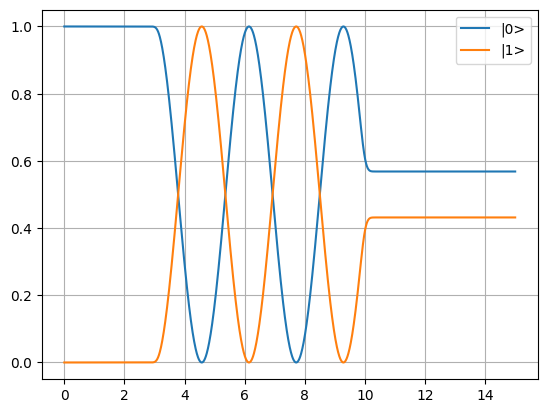

In [7]:
t = solver.time_list
population = solver.get_populations_evolution([spin])
labels = ["|0>", "|1>"]

plt.figure()
for label, level_population in zip(labels, population):
    plt.plot(t, level_population, label=label)
plt.grid()
plt.legend()
plt.show()